In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import xgboost as xgb
import lightgbm as lbm
import catboost  as  ctb
import seaborn as  sns
import matplotlib 
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [163]:
p = Path.home() / 'AppData' / 'Local' / 'Packages' / \
...     'PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0' / \
...     'LocalCache' / 'local-packages' / 'Python39' / 'Scripts' / 'general_data.csv'

general_data = pd.read_csv(p)

In [164]:
p = Path.home() / 'AppData' / 'Local' / 'Packages' / \
...     'PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0' / \
...     'LocalCache' / 'local-packages' / 'Python39' / 'Scripts' / 'employee_survey_data.csv'

employee_data = pd.read_csv(p)

In [165]:
p = Path.home() / 'AppData' / 'Local' / 'Packages' / \
...     'PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0' / \
...     'LocalCache' / 'local-packages' / 'Python39' / 'Scripts' / 'manager_survey_data.csv'

manager_data = pd.read_csv(p)

In [166]:
#merging data on id of employeee that is present in all 3 files
train = general_data.merge(employee_data, on='EmployeeID', how='left')

In [167]:
train = train.merge(manager_data, on='EmployeeID', how='left')

In [168]:
train.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3


In [169]:
train.shape

(4410, 29)

In [170]:
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [171]:
#see if there are NULL values in data in order to take action with them
data=train
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [172]:
#since  we have  missing data both for numerical and categorical data we will do the following 

In [173]:
#first we encode to numerical the categorical feats
 
for col in train.columns:
    if train[col].dtype=="object":
       le = LabelEncoder()
       train[col] = le.fit_transform(train[col])

In [174]:
#filling missing values with mean but there are other  ways also 
train=train.fillna(train.mean())

In [175]:
np.unique(train["Over18"],return_counts=True)

(array([0]), array([4410]))

In [176]:
np.unique(train["StandardHours"],return_counts=True)

(array([8]), array([4410]))

In [177]:
np.unique(train["EmployeeCount"],return_counts=True)

(array([1]), array([4410]))

In [178]:
#droping this columns since  they have zero variance

In [179]:

train=train.drop(['EmployeeID', 'Over18', 'StandardHours', 'EmployeeCount'],axis=1)


In [180]:
#lets look at  attrition distro
print(np.unique(train['Attrition'], return_counts=True))
 

(array([0, 1]), array([3699,  711]))


In [181]:
#we can ovserve it is an unbalanced datasset

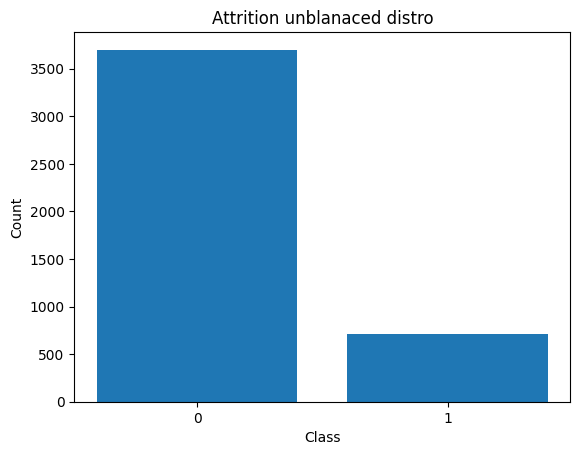

In [182]:
counts = np.bincount(train['Attrition'])
labels = ['0', '1']

# Create barplot
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Attrition unblanaced distro')
plt.show()

In [183]:
#plot correlation ammong  variables

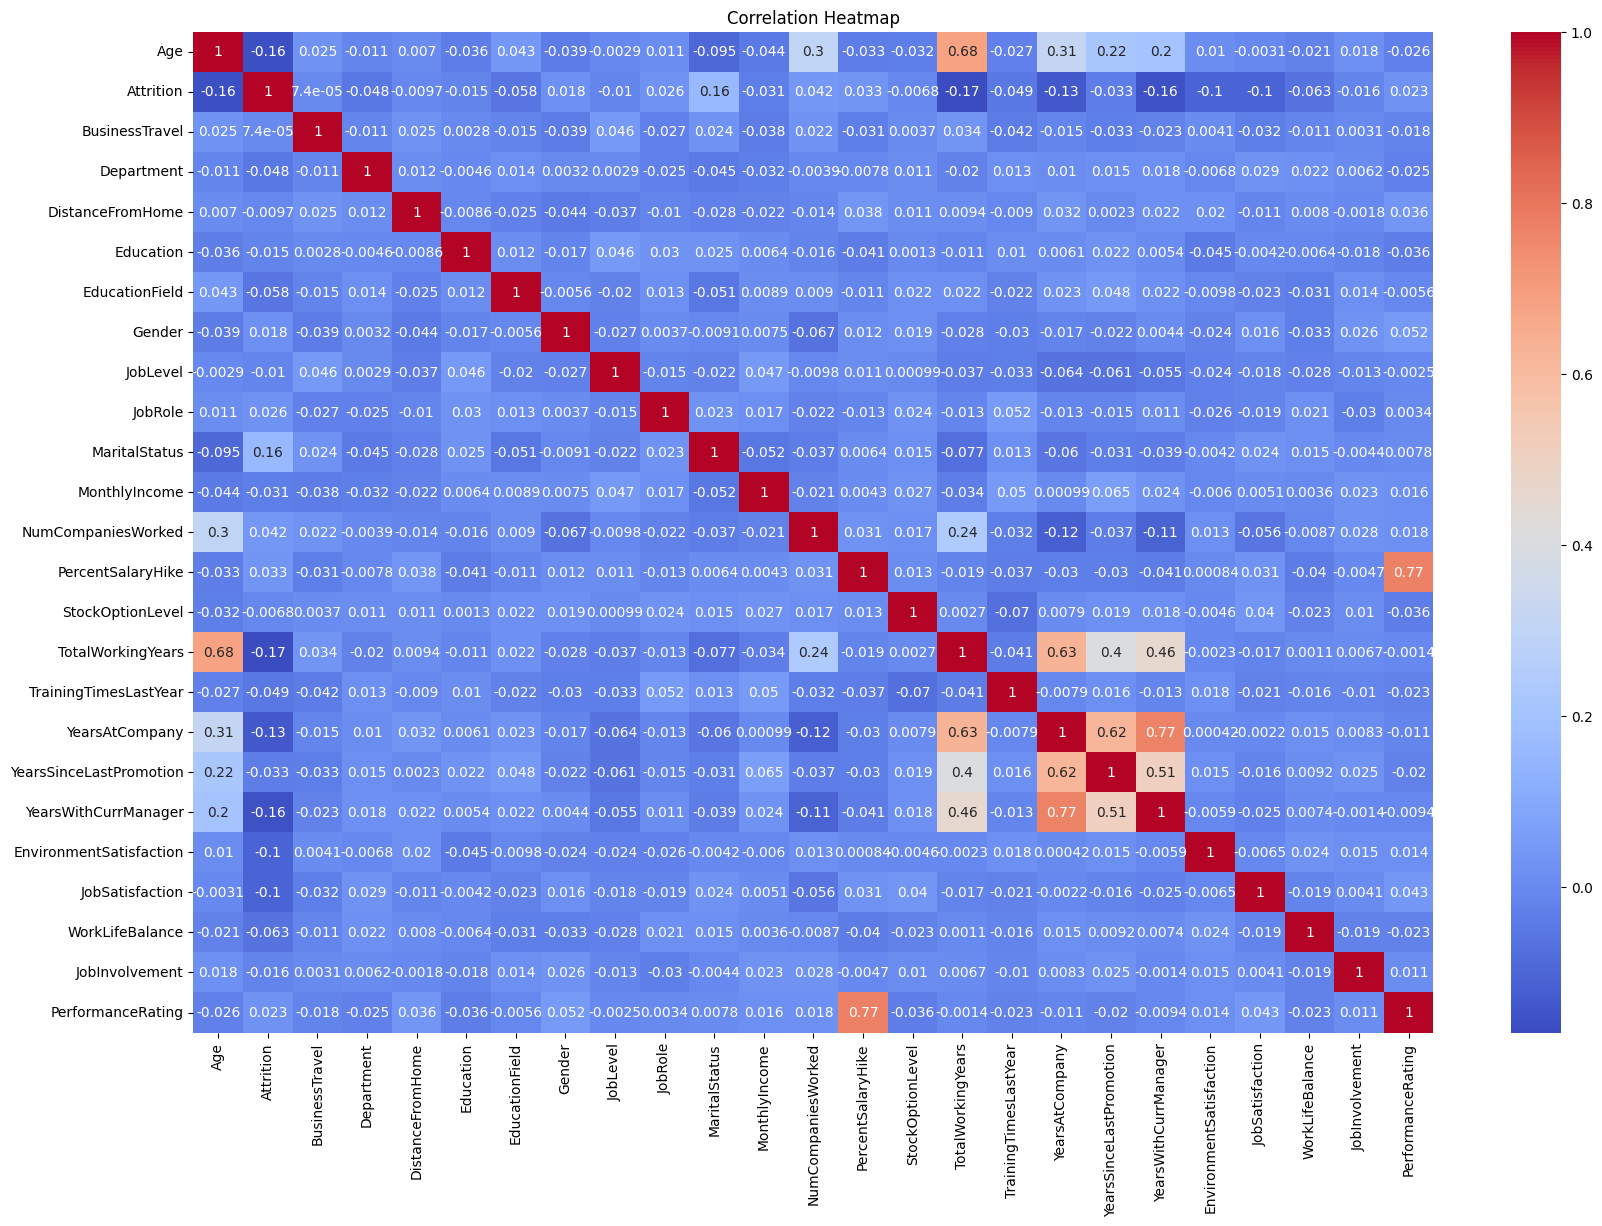

In [184]:
plt.figure(figsize=(20, 13))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [185]:
# we can see some data are not correlated some  are high correlated , wich can send us of ideea to do  PCA , in order to have new features
#for prediction part 
#same with k-means
#Observation - for PCA will select only features that have some degree of correlation according to a treshold

In [186]:
y=train["Attrition"]
X=train.drop("Attrition",axis=1)
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,2,2,6,2,1,0,1,0,1,...,1.000000,6,1,0,0,3.0,4.0,2.000000,3,3
1,31,1,1,10,1,1,0,1,6,2,...,6.000000,3,5,1,4,3.0,2.0,4.000000,2,4
2,32,1,1,17,4,4,1,4,7,1,...,5.000000,2,5,0,3,2.0,2.0,1.000000,3,3
3,38,0,1,2,5,1,1,3,1,1,...,13.000000,5,8,7,5,4.0,4.0,3.000000,2,3
4,32,2,1,10,1,3,1,1,7,2,...,9.000000,2,6,0,4,4.0,1.0,3.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,2,1,5,4,3,0,1,6,2,...,10.000000,5,3,0,2,4.0,1.0,3.000000,3,3
4406,29,2,1,2,4,3,1,1,2,0,...,10.000000,2,3,0,2,4.0,4.0,3.000000,2,3
4407,25,2,1,25,2,1,1,2,7,1,...,5.000000,4,4,1,2,1.0,3.0,3.000000,3,4
4408,42,2,2,18,2,3,1,1,2,0,...,10.000000,2,9,7,8,4.0,1.0,3.000000,2,3


In [187]:
train=X

In [188]:
train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,2,2,6,2,1,0,1,0,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,10,1,1,0,1,6,2,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,1,1,17,4,4,1,4,7,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,1,2,5,1,1,3,1,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,2,1,10,1,3,1,1,7,2,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [189]:

scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [190]:
scaler.mean_

array([3.69238095e+01, 1.60748299e+00, 1.26054422e+00, 9.19251701e+00,
       2.91292517e+00, 2.24761905e+00, 6.00000000e-01, 2.06394558e+00,
       4.45850340e+00, 1.09727891e+00, 6.50293129e+04, 2.69483033e+00,
       1.52095238e+01, 7.93877551e-01, 1.12799364e+01, 2.79931973e+00,
       7.00816327e+00, 2.18775510e+00, 4.12312925e+00, 2.72360319e+00,
       2.72824601e+00, 2.76143641e+00, 2.72993197e+00, 3.15374150e+00])

In [191]:
scaler.scale_

array([9.13226569e+00, 6.65228561e-01, 5.27612750e-01, 8.10410653e+00,
       1.02381653e+00, 1.33091618e+00, 4.89897949e-01, 1.10656332e+00,
       2.46098381e+00, 7.29872375e-01, 4.70635516e+04, 2.49321404e+00,
       3.65869263e+00, 8.51786797e-01, 7.77339375e+00, 1.28883202e+00,
       6.12444095e+00, 3.22133403e+00, 3.56692226e+00, 1.08953037e+00,
       1.09862803e+00, 7.03115545e-01, 7.11319074e-01, 3.60700775e-01])

In [192]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.54136892,  0.59004834,  1.40151234, ..., -1.08294635,
         0.37967213, -0.42623002],
       [-0.64866811, -0.91319439, -0.49381714, ...,  1.76153634,
        -1.02616674,  2.34615106],
       [-0.53916626, -0.91319439, -0.49381714, ..., -2.5051877 ,
         0.37967213, -0.42623002],
       ...,
       [-1.30567922,  0.59004834, -0.49381714, ...,  0.339295  ,
         0.37967213,  2.34615106],
       [ 0.55585225,  0.59004834,  1.40151234, ...,  0.339295  ,
        -1.02616674, -0.42623002],
       [ 0.33684855,  0.59004834, -0.49381714, ...,  0.        ,
         1.78551099, -0.42623002]])

In [193]:
X_scaled.mean(axis=0)

array([-3.06129523e-17, -5.96146967e-17, -1.41786306e-16,  4.35026165e-17,
        5.80034886e-17,  4.65236315e-17,  3.54465764e-17, -2.69877343e-17,
       -2.25569122e-17,  1.27084032e-16,  5.59894786e-17,  5.35726666e-17,
        2.27180330e-16,  5.96146967e-17,  1.25271423e-16,  1.09562145e-16,
       -3.50437744e-17, -4.02802004e-19, -2.81961403e-17, -1.35744275e-16,
        1.31313453e-16,  2.38861589e-16,  6.64623307e-17, -6.03397403e-16])

In [194]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [195]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.78571429, 1.        , 1.        , ..., 0.33333333, 0.66666667,
        0.        ],
       [0.30952381, 0.5       , 0.5       , ..., 1.        , 0.33333333,
        1.        ],
       [0.33333333, 0.5       , 0.5       , ..., 0.        , 0.66666667,
        0.        ],
       ...,
       [0.16666667, 1.        , 0.5       , ..., 0.66666667, 0.66666667,
        1.        ],
       [0.57142857, 1.        , 1.        , ..., 0.66666667, 0.33333333,
        0.        ],
       [0.52380952, 1.        , 0.5       , ..., 0.58714547, 1.        ,
        0.        ]])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [157]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])